In [ ]:
print("="*120)
# CARDIOVASCULAR DISEASE PREDICTION - COMPLETE MAJOR PROJECT
# STUDENT :- GOPAL TIWARI , BTECH CSE 2 YEAR,AI INTENSHIP 2025
print("="*60)

In [2]:
# IMPORT ALL LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Machine learning library
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc

# Google Colab file upload
from google.colab import files
uploaded = files.upload()

# Visualization setting
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
print("="*60)

Saving CARIDIOVASUCULAR MINOR.csv to CARIDIOVASUCULAR MINOR (5).csv


In [ ]:
# DATA LOADING & INITIAL EXPLORATION
print("="*60)
#load dataset
df = pd.read_csv("CARIDIOVASUCULAR MINOR (1).csv", sep=';')
df.rename(columns={'cardio': 'target'}, inplace=True)
print("="*60)
# Display column names
print("Column Names:")
print(df.columns)
print("="*60)
# first 5 rows
print("First 5 Rows:")
print(df.head())
print("="*60)
# last 5 rows
print("Last 5 Rows:")
print(df.tail())
print("="*60)
# Display data types
print("Data Types:")
print(df.dtypes)
print("="*60)
# statistical summary
print("Statistical Summary:")
print(df.describe())
print("="*60)
# Display missing values
print("Missing Values:")
print(df.isnull().sum())
print("="*60)
# target variable distribution
print("Target Variable Distribution:")
print(df["target"].value_counts())
print("="*60)
print("feature description:")
print(".age: age in days")
print(".sex: sex (1 = male; 0 = female)")
print(".heihgt: height in cm")
print(".weight: weight in kg")
print(".ap_hi: systolic blood pressure")
print(".ap_lo: diastolic blood pressure")
print(".cholesterol: (1=normal; 2=above normal; 3=well above normal)")
print(".gluc: (1=normal; 2=above normal; 3=well above normal)")
print(".smoke: smoker (1=yes; 0=no)")
print(".alco: alcohol consumption (1=yes; 0=no)")
print(".active: physical activity (1=yes; 0=no)")
print(".cardio: cardio vascular disease (1=yes; 0=no)")
print("="*60)

In [4]:
# DATA PREPROCESING
print("="*60)
df_processed = df.copy()
print("feature description:")

#1. Age : days to year
df_processed['age_years'] = df_processed['age'] / 365.25
print(f"Age converted : {df_processed['age'].iloc[0]} days - {df_processed['age_years'].iloc[0]}years")
print("="*60)
# 2. BMI calculation
df_processed['bmi'] = df_processed['weight'] / (df_processed['height'] / 100) ** 2
print(f"BMI calculated : {df_processed['bmi'].iloc[0]}")
print("="*60)
# 3. pulse pressure
df_processed['pulse_pressure'] = df_processed['ap_hi'] - df_processed['ap_lo']
print(f"Pulse pressure calculated : {df_processed['pulse_pressure'].iloc[0]}")
print("="*60)
# 4. OUTLIER REMOVAL
print("Outlier Detection")
print(f"Before outlier removal : {df_processed.shape}")
print("="*60)
# Define outliers
bp_outliers = df_processed[(df_processed['ap_hi'] > 200) | (df_processed['ap_lo'] > 150)]
cholesterol_outliers = df_processed[(df_processed['cholesterol'] < 1) | (df_processed['cholesterol'] > 3)]
height_outliers = df_processed[(df_processed['height'] < 100) | (df_processed['height'] > 250)]
weight_outliers = df_processed[(df_processed['weight'] < 40) | (df_processed['weight'] > 200)]
age_outliers = df_processed[(df_processed['age_years'] < 18) | (df_processed['age_years'] > 100)]
pulse_pressure_outliers = df_processed[(df_processed['pulse_pressure'] < 0) | (df_processed['pulse_pressure'] > 100)]

print(f"BP outliers : {bp_outliers.shape}")
print(f"Cholesterol outliers : {cholesterol_outliers.shape}")
print(f"Height outliers : {height_outliers.shape}")
print(f"Weight outliers : {weight_outliers.shape}")
print(f"Age outliers : {age_outliers.shape}")
print(f"Pulse pressure outliers : {pulse_pressure_outliers.shape}")
print("="*60)

# Remove ouliers
df_processed = df_processed[~df_processed.index.isin(bp_outliers.index)]
df_processed = df_processed[~df_processed.index.isin(cholesterol_outliers.index)]
df_processed = df_processed[~df_processed.index.isin(height_outliers.index)]
df_processed = df_processed[~df_processed.index.isin(weight_outliers.index)]
df_processed = df_processed[~df_processed.index.isin(age_outliers.index)]
df_processed = df_processed[~df_processed.index.isin(pulse_pressure_outliers.index)]


print(f"After outlier removal : {df_processed.shape}")
print("="*60)

# Categorical feature
df_processed['age_group'] = pd.cut(df_processed['age_years'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], right=False)
df_processed['bmi_group'] = pd.cut(df_processed['bmi']
                                , bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'], right=False)
print("="*60)
print(df_processed.head())

feature description:
Age converted : 18393 days - 50.35728952772074years
BMI calculated : 21.9671201814059
Pulse pressure calculated : 30
Outlier Detection
Before outlier removal : (70000, 16)
BP outliers : (1066, 16)
Cholesterol outliers : (0, 16)
Height outliers : (29, 16)
Weight outliers : (52, 16)
Age outliers : (0, 16)
Pulse pressure outliers : (1381, 16)
After outlier removal : (68509, 16)
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  target  age_years        bmi  pulse_pressure age_group  \
0     0       1       0  50.357290  21.967120

EXPLORATORY DATA ANALYSIS COMPREHENSIVE VISUALIZATION


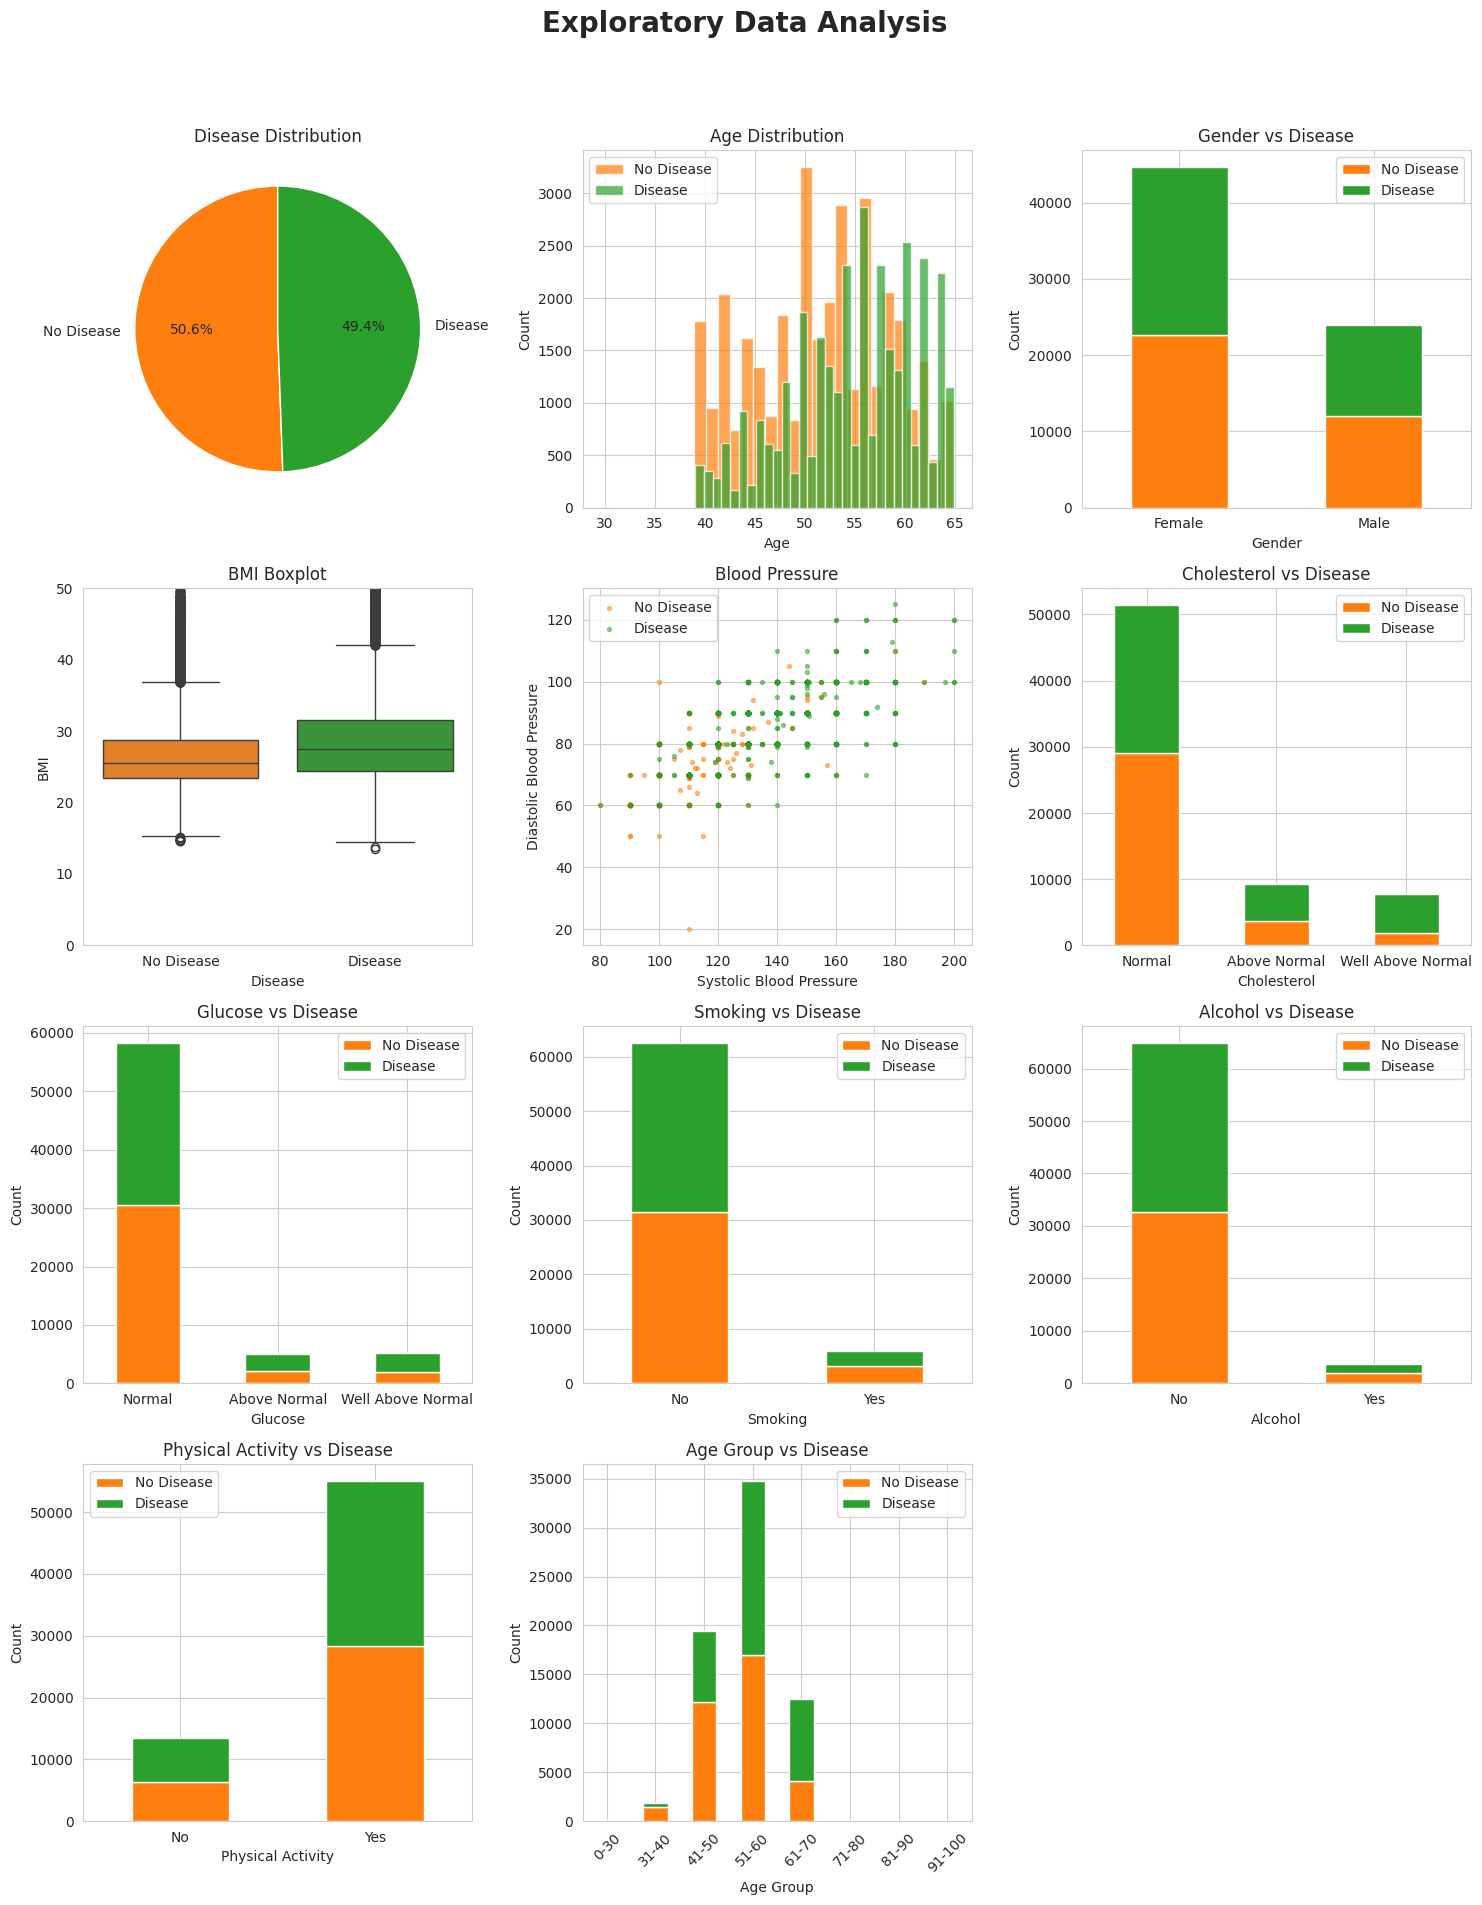

Correlation Matrix


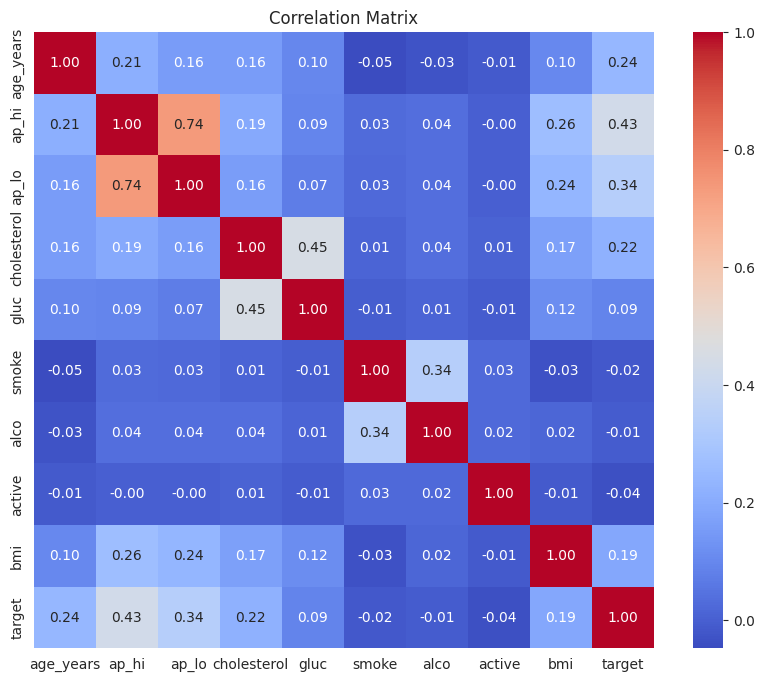

DATA PREPROCESSING


In [5]:
# EXPLORATORY DATA ANALYSIS COMPREHENSIVE VISUALIZATION
print("="*60)
print("EXPLORATORY DATA ANALYSIS COMPREHENSIVE VISUALIZATION")
print("="*60)

# Create subplots for all visualizations
fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # Adjusted subplot grid
fig.suptitle('Exploratory Data Analysis',fontsize=20,fontweight='bold')
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'] # Corrected colors tuple

# Flatten axs for easier iteration
axs = axs.flatten()

# 1. Disease distribution (pie)
axs[0].pie(df_processed['target'].value_counts(), labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Disease Distribution')

# 2. Age distribution
for d, col in zip([0, 1], colors):
    axs[1].hist(df_processed[df_processed['target'] == d]['age_years'], bins=30, alpha=0.7, color=col, label=['No Disease', 'Disease'][d])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].set_title('Age Distribution')
axs[1].legend()

# 3. Gender vs disease
df_processed.groupby(['gender', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[2], color=colors)
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Count')
axs[2].set_title('Gender vs Disease')
axs[2].legend(['No Disease', 'Disease'])
axs[2].set_xticklabels(['Female', 'Male'], rotation=0)

# 4. BMI boxplot
sns.boxplot(x='target', y='bmi', data=df_processed, ax=axs[3], palette=colors)
axs[3].set_xlabel('Disease')
axs[3].set_ylabel('BMI')
axs[3].set_title('BMI Boxplot')
axs[3].set_xticklabels(['No Disease', 'Disease'])
axs[3].set_ylim(0, df_processed['bmi'].quantile(0.99)) # Limit y-axis to avoid extreme outliers
axs[3].set_yticks(np.arange(0, axs[3].get_ylim()[1] + 10, 10))
axs[3].grid(axis='y')

# 5. Blood pressure scatter
for d, col in zip([0, 1], colors):
    subset = df_processed[df_processed['target'] == d].sample(min(1500, len(df_processed[df_processed['target'] == d])))
    axs[4].scatter(subset['ap_hi'], subset['ap_lo'], c=col, alpha=0.5, s=8, label=['No Disease', 'Disease'][d])
axs[4].set_title('Blood Pressure')
axs[4].legend()
axs[4].set_xlabel('Systolic Blood Pressure')
axs[4].set_ylabel('Diastolic Blood Pressure')


# 6. Cholesterol vs Disease
df_processed.groupby(['cholesterol', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[5], color=colors)
axs[5].set_xlabel('Cholesterol')
axs[5].set_ylabel('Count')
axs[5].set_title('Cholesterol vs Disease')
axs[5].legend(['No Disease', 'Disease'])
axs[5].set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)

# 7. Glucose vs Disease
df_processed.groupby(['gluc', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[6], color=colors)
axs[6].set_xlabel('Glucose')
axs[6].set_ylabel('Count')
axs[6].set_title('Glucose vs Disease')
axs[6].legend(['No Disease', 'Disease'])
axs[6].set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)


# 8. Smoking vs Disease
df_processed.groupby(['smoke', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[7], color=colors)
axs[7].set_xlabel('Smoking')
axs[7].set_ylabel('Count')
axs[7].set_title('Smoking vs Disease')
axs[7].legend(['No Disease', 'Disease'])
axs[7].set_xticklabels(['No', 'Yes'], rotation=0)

# 9. Alcohol vs Disease
df_processed.groupby(['alco', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[8], color=colors)
axs[8].set_xlabel('Alcohol')
axs[8].set_ylabel('Count')
axs[8].set_title('Alcohol vs Disease')
axs[8].legend(['No Disease', 'Disease'])
axs[8].set_xticklabels(['No', 'Yes'], rotation=0)

# 10. Physical Activity vs Disease
df_processed.groupby(['active', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[9], color=colors)
axs[9].set_xlabel('Physical Activity')
axs[9].set_ylabel('Count')
axs[9].set_title('Physical Activity vs Disease')
axs[9].legend(['No Disease', 'Disease'])
axs[9].set_xticklabels(['No', 'Yes'], rotation=0)

# 11. Age Group vs Disease
df_processed.groupby(['age_group', 'target']).size().unstack().plot(kind='bar', stacked=True, ax=axs[10], color=colors)
axs[10].set_xlabel('Age Group')
axs[10].set_ylabel('Count')
axs[10].set_title('Age Group vs Disease')
axs[10].legend(['No Disease', 'Disease'])
axs[10].tick_params(axis='x', rotation=45) # Rotate labels for better readability

# Remove unused subplots
for i in range(11, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("="*60)

#12. correlation matrix
print("Correlation Matrix")
corr_cols = ['age_years','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','bmi', 'target'] # Included target and age_years
corr_matrix = df_processed[corr_cols].corr()
plt.figure(figsize=(10, 8)) # New figure for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print("="*60)

print("DATA PREPROCESSING") # This print statement seems out of place here, keeping it as in original code
print("="*60)

In [6]:
# FEATURE PREPRATION
print("="*60)
# Select feature
feature = ['age_years', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
X = df_processed[feature]
y = df_processed['target']
print("="*60)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("="*60)

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("="*60)


In [7]:
# MODEL TRAINING AND EVALUATION
print("="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

# Initialize models
from sklearn.svm import SVC # Import SVC
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True), # Correctly initialize SVC with probability=True
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier() # Correct key name
}
results = {}
trained_models = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    # Train on scaled data for all models
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None # Check if model has predict_proba

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None # Correct syntax for conditional assignment
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    auc_score = auc(fpr, tpr) if fpr is not None and tpr is not None else None


    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'AUC': auc_score,
        # Coefficients are typically only available for linear models like Logistic Regression
        'Coefficients': model.coef_ if hasattr(model, 'coef_') else None
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}" if roc_auc is not None else f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: N/A")
    print("="*60)

# Print model evaluation results
print("MODEL EVALUATION SUMMARY")
print("="*60)
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}") # Corrected print format
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}" if metrics['ROC AUC'] is not None else "  ROC AUC: N/A")
    print(f"  AUC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else "  AUC: N/A")
    if metrics['Coefficients'] is not None:
        print(f"  Coefficients: {metrics['Coefficients']}")
    print("-" * 30)

print("="*60)

MODEL TRAINING AND EVALUATION
Training Logistic Regression...
Logistic Regression - Accuracy: 0.7226, Precision: 0.7507, Recall: 0.6620, F1 Score: 0.7035, ROC AUC: 0.7901
Training Decision Tree...
Decision Tree - Accuracy: 0.6319, Precision: 0.6314, Recall: 0.6238, F1 Score: 0.6276, ROC AUC: 0.6319
Training SVM...
SVM - Accuracy: 0.7274, Precision: 0.7578, Recall: 0.6640, F1 Score: 0.7078, ROC AUC: 0.7857
Training Random Forest...
Random Forest - Accuracy: 0.6972, Precision: 0.7032, Recall: 0.6766, F1 Score: 0.6897, ROC AUC: 0.7594
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.6908, Precision: 0.6921, Recall: 0.6813, F1 Score: 0.6867, ROC AUC: 0.7405
MODEL EVALUATION SUMMARY
Logistic Regression:
  Accuracy: 0.7226
  Precision: 0.7507
  Recall: 0.6620
  F1 Score: 0.7035
  ROC AUC: 0.7901
  AUC: 0.7901
  Coefficients: [[ 0.34075104  0.93782071  0.103544    0.33385694 -0.06515367 -0.03373198
  -0.04564167 -0.09315312  0.13646167]]
------------------------------
Decisio

In [9]:
# MODEL COMPARISION & BEST MODEL SELECTION
print("="*60)
print("MODEL COMPARISION & BEST MODEL SELECTION")
print("="*60)
# Result table
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)
print("="*60)
# Model ranking
print("Model Ranking:")
print(results_df.drop(columns=['Coefficients']).rank(ascending=False))
print("="*60)
# Best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
print(f"Best Model: {best_model_name}")
print("="*60)

MODEL COMPARISION & BEST MODEL SELECTION
                     Accuracy Precision    Recall  F1 Score   ROC AUC  \
SVM                  0.727412  0.757789  0.664025  0.707815  0.785729   
Logistic Regression  0.722595  0.750666   0.66197  0.703533  0.790065   
Random Forest        0.697197  0.703173  0.676648  0.689655  0.759421   
K-Nearest Neighbors  0.690848  0.692113  0.681344  0.686686  0.740491   
Decision Tree        0.631879  0.631407  0.623807  0.627584  0.631881   

                          AUC  \
SVM                  0.785729   
Logistic Regression  0.790065   
Random Forest        0.759421   
K-Nearest Neighbors  0.740491   
Decision Tree        0.631881   

                                                          Coefficients  
SVM                                                                NaN  
Logistic Regression  [[0.340751041608532, 0.9378207111456826, 0.103...  
Random Forest                                                      NaN  
K-Nearest Neighbors          

DETAIL EVALUTION OF BEST MODEL
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6889
           1       0.76      0.66      0.71      6813

    accuracy                           0.73     13702
   macro avg       0.73      0.73      0.73     13702
weighted avg       0.73      0.73      0.73     13702

Confusion Matrix:
 True Negative:5,443
 True Negative:5,443
 False Positive:1,446
 False Negative:2,289
 True Positive:4,524


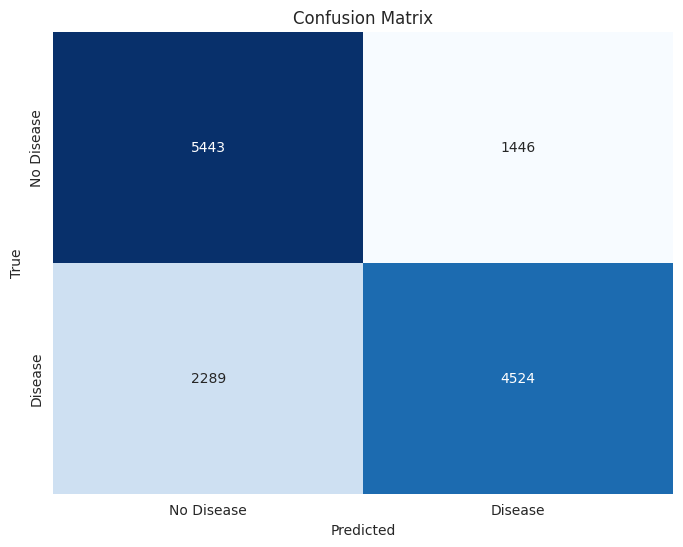

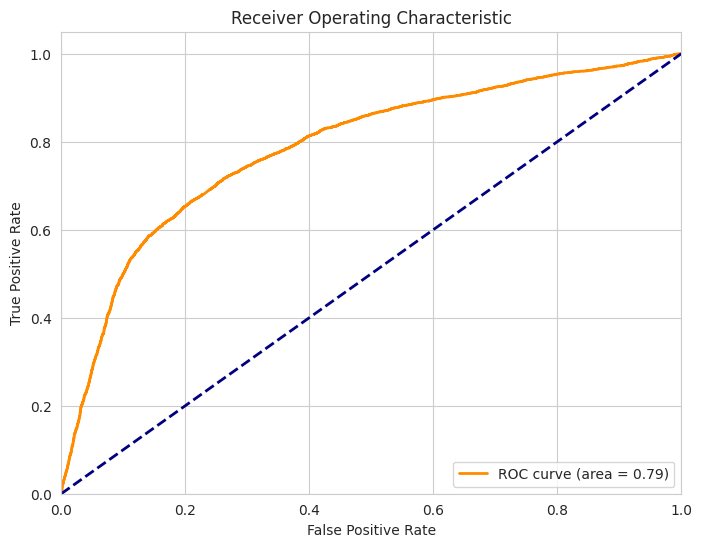

Feature importance is not available for this model.


In [11]:
# DETAIL EVALUTION OF BEST MODEL
print("="*60)
print("DETAIL EVALUTION OF BEST MODEL")
print("="*60)
# Get predictions
scaled = best_model_name in ['Logistic Regression', 'SVM','k-nearest', 'Random Forest']
Xte = X_test_scaled if scaled else X_test
y_pred = best_model.predict(Xte)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("="*60)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(f" True Negative:{cm[0,0]:,}")
print(f" True Negative:{cm[0,0]:,}")
print(f" False Positive:{cm[0,1]:,}")
print(f" False Negative:{cm[1,0]:,}")
print(f" True Positive:{cm[1,1]:,}")
print("="*60)

#visualization confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("="*60)

# ROC curve
if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(Xte)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    label='AUC = %0.2f' % roc_auc
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not available for this model.")
print("="*60)

# Feature importance
if best_model_name in ['Logistic Regression', 'Random Forest']:
    feature_importances = best_model.coef_[0] if best_model_name == 'Logistic Regression' else best_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()
    print("="*60)
else:
    print("Feature importance is not available for this model.")
print("="*60)

In [14]:
# PROJECT SUMMARY & RESULTS EXPORT
print("="*60)
print("PROJECT SUMMARY & RESULTS EXPORT")
print("="*60)

print("dataset")
print(f" original:70,000 ,cleaned:{len(df_processed):,}")
print(f"feature:{len(feature)}")
print(f"best model:{best_model_name}")
print(f"best model accuracy:{results_df.loc[best_model_name,'Accuracy']:.4f}")
print("key finding:")
print(".age and bp are strong predictor")
print(".bmi& cholestrol impact disease risk")
print(". lifestyle factor matter")
# Save result
results_df.to_csv('result.csv', index=False)
print("="*60)
print("RESULTS EXPORT")
print("="*60)
# MAJOR PROJECT COMPLETED BY :- GOPAL TIWARI
print("MAJOR PROJECT COMPLETED BY :- GOPAL TIWARI")

PROJECT SUMMARY & RESULTS EXPORT
dataset
 original:70,000 ,cleaned:68,509
feature:9
best model:SVM
best model accuracy:0.7274
key finding:
.age and bp are strong predictor
.bmi& cholestrol impact disease risk
. lifestyle factor matter
RESULTS EXPORT
MAJOR PROJECT COMPLETED BY :- GOPAL TIWARI
